<a href="https://colab.research.google.com/github/pank8/python/blob/master/Homework%20Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Установка PySpark и др**

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz

In [24]:
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz

spark-2.4.3-bin-hadoop2.7/
spark-2.4.3-bin-hadoop2.7/python/
spark-2.4.3-bin-hadoop2.7/python/setup.cfg
spark-2.4.3-bin-hadoop2.7/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.3-bin-hadoop2.7/python/pyspark

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Загрузка данных из CSV**

In [0]:
df = spark.read.csv('iris.csv', inferSchema=True, header=True)

In [30]:
df.show(10)

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows



In [31]:
df= df.withColumnRenamed('sepal.length', 'sepallength')
df= df.withColumnRenamed('sepal.width', 'sepalwidth')
df= df.withColumnRenamed('petal.length', 'petallength')
df= df.withColumnRenamed('petal.width', 'petalwidth')
df.show(10)

+-----------+----------+-----------+----------+-------+
|sepallength|sepalwidth|petallength|petalwidth|variety|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| Setosa|
|        4.9|       3.0|        1.4|       0.2| Setosa|
|        4.7|       3.2|        1.3|       0.2| Setosa|
|        4.6|       3.1|        1.5|       0.2| Setosa|
|        5.0|       3.6|        1.4|       0.2| Setosa|
|        5.4|       3.9|        1.7|       0.4| Setosa|
|        4.6|       3.4|        1.4|       0.3| Setosa|
|        5.0|       3.4|        1.5|       0.2| Setosa|
|        4.4|       2.9|        1.4|       0.2| Setosa|
|        4.9|       3.1|        1.5|       0.1| Setosa|
+-----------+----------+-----------+----------+-------+
only showing top 10 rows



In [32]:
df.dtypes

[('sepallength', 'double'),
 ('sepalwidth', 'double'),
 ('petallength', 'double'),
 ('petalwidth', 'double'),
 ('variety', 'string')]

**Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров**

In [33]:
df_max = df.groupBy('variety').max('sepallength', 'sepalwidth', 'petallength', 'petalwidth')
df_max.show()

+----------+----------------+---------------+----------------+---------------+
|   variety|max(sepallength)|max(sepalwidth)|max(petallength)|max(petalwidth)|
+----------+----------------+---------------+----------------+---------------+
| Virginica|             7.9|            3.8|             6.9|            2.5|
|    Setosa|             5.8|            4.4|             1.9|            0.6|
|Versicolor|             7.0|            3.4|             5.1|            1.8|
+----------+----------------+---------------+----------------+---------------+



In [34]:
df_min = df.groupBy('variety').min('sepallength', 'sepalwidth', 'petallength', 'petalwidth')
df_min.show()

+----------+----------------+---------------+----------------+---------------+
|   variety|min(sepallength)|min(sepalwidth)|min(petallength)|min(petalwidth)|
+----------+----------------+---------------+----------------+---------------+
| Virginica|             4.9|            2.2|             4.5|            1.4|
|    Setosa|             4.3|            2.3|             1.0|            0.1|
|Versicolor|             4.9|            2.0|             3.0|            1.0|
+----------+----------------+---------------+----------------+---------------+



In [35]:
df_avg = df.groupBy('variety').avg('sepallength', 'sepalwidth', 'petallength', 'petalwidth')
df_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety| avg(sepallength)|   avg(sepalwidth)|  avg(petallength)|   avg(petalwidth)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [36]:
df_all = df_max.join(df_min, 'variety', how='inner')
df_all = df_all.join(df_avg, 'variety', how='inner')
df_all.show()

+----------+----------------+---------------+----------------+---------------+----------------+---------------+----------------+---------------+-----------------+------------------+------------------+------------------+
|   variety|max(sepallength)|max(sepalwidth)|max(petallength)|max(petalwidth)|min(sepallength)|min(sepalwidth)|min(petallength)|min(petalwidth)| avg(sepallength)|   avg(sepalwidth)|  avg(petallength)|   avg(petalwidth)|
+----------+----------------+---------------+----------------+---------------+----------------+---------------+----------------+---------------+-----------------+------------------+------------------+------------------+
| Virginica|             7.9|            3.8|             6.9|            2.5|             4.9|            2.2|             4.5|            1.4|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|             5.8|            4.4|             1.9|            0.6|             4.3|            2.3|         

**Визуализируйте точечный график (plt.scatter) по каждой паре параметров**

In [0]:
sepallength = df[['sepallength']].collect()
ssepalwidth = df[['sepalwidth']].collect()

In [0]:
pd_df = df.toPandas()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


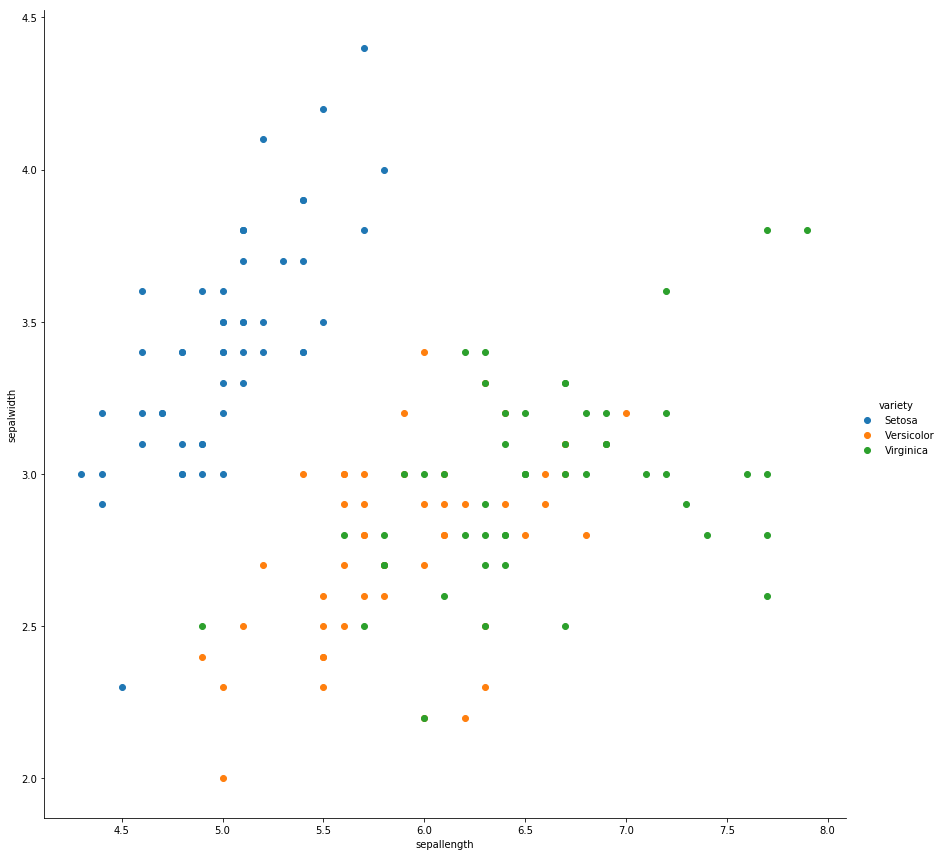

In [43]:
FacetGrid = sns.FacetGrid(pd_df, hue="variety", size = 12)
FacetGrid.map(plt.scatter, "sepallength", "sepalwidth", linewidth = 1)
FacetGrid.add_legend()

**Попробуйте отделить какой-нибудь тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)**

Пусть гипотеза звучит следующим образом: если sepalwidth > 3.5 , sepallength < 5, то цветок относится к Setosa

**Сделайте отдельную колонку для своего предсказания**

In [0]:
def label_race (row):
  if row['sepalwidth']>3.5 and  row['sepallength']<5:
    return 'Setosa'
  return 'Other'

In [49]:
pd_df['prediction'] = pd_df.apply (lambda row: label_race(row), axis=1)
pd_df.head()

,sepallength,sepalwidth,petallength,petalwidth,variety,prediction
0,5.1,3.5,1.4,0.2,Setosa,Other
1,4.9,3.0,1.4,0.2,Setosa,Other
2,4.7,3.2,1.3,0.2,Setosa,Other
3,4.6,3.1,1.5,0.2,Setosa,Other
4,5.0,3.6,1.4,0.2,Setosa,Other


**Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)**

In [0]:
def check (row):
  if row['variety'] == row['prediction']:
    return 'wow'
  return 'oops'

In [52]:
pd_df['check'] = pd_df.apply (lambda row: check(row), axis=1)
pd_df.head()

,sepallength,sepalwidth,petallength,petalwidth,variety,prediction,check
0,5.1,3.5,1.4,0.2,Setosa,Other,oops
1,4.9,3.0,1.4,0.2,Setosa,Other,oops
2,4.7,3.2,1.3,0.2,Setosa,Other,oops
3,4.6,3.1,1.5,0.2,Setosa,Other,oops
4,5.0,3.6,1.4,0.2,Setosa,Other,oops


In [53]:
pd_df.check.value_counts()

oops    148
wow       2
Name: check, dtype: int64

Вывод: качество ужасное, надо тестить дальше))